## Load and explore dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel(r"C:\Users\Minion\Downloads\raw dataset flipkart.xlsx")

In [6]:
df.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990.0,15990.0
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990.0,15990.0
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990.0,17990.0
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990.0,17990.0
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990.0,15990.0


In [27]:
df.tail()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
2642,Xiaomi,Redmi Y3,Bold Red,4 GB,64 GB,4.3,12999.0,13999.0
2643,Xiaomi,Redmi Y3,Elegant Blue,3 GB,32 GB,4.3,9450.0,NaN
2644,Xiaomi,Redmi Y3,Elegant Blue,4 GB,64 GB,4.2,12999.0,NaN
2645,Xiaomi,Redmi Y3,Prime Black,3 GB,32 GB,4.2,9950.0,NaN
2646,Xiaomi,Redmi Y3,Prime Black,4 GB,64 GB,4.3,12499.0,13999.0


In [29]:
df.shape

(2647, 8)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2647 entries, 0 to 2646
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           2647 non-null   object 
 1   Model           2645 non-null   object 
 2   Color           2505 non-null   object 
 3   Memory          2605 non-null   object 
 4   Storage         2568 non-null   object 
 5   Rating          2647 non-null   float64
 6   Selling Price   2644 non-null   float64
 7   Original Price  969 non-null    float64
dtypes: float64(3), object(5)
memory usage: 165.6+ KB


In [33]:
df.isna().sum()

Brand                0
Model                2
Color              142
Memory              42
Storage             79
Rating               0
Selling Price        3
Original Price    1678
dtype: int64

In [35]:
df.dropna()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990.0,15990.0
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990.0,15990.0
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990.0,17990.0
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990.0,17990.0
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990.0,15990.0
...,...,...,...,...,...,...,...,...
2627,Xiaomi,Redmi Note 9 Pro,Champagne Gold,6 GB,128 GB,4.3,18499.0,18999.0
2629,Xiaomi,Redmi Note 9 Pro,Glacier White,4 GB,64 GB,4.3,16488.0,16999.0
2638,Xiaomi,Redmi Y2,Gold,3 GB,32 GB,4.2,9468.0,10499.0
2642,Xiaomi,Redmi Y3,Bold Red,4 GB,64 GB,4.3,12999.0,13999.0


In [9]:
df.columns

Index(['Brand', 'Model', 'Color', 'Memory', 'Storage', 'Rating',
       'Selling Price', 'Original Price'],
      dtype='object')

In [11]:
df['Price'] = pd.to_numeric(df['Selling Price'], errors='coerce')
df['Ratings'] = pd.to_numeric(df['Rating'], errors='coerce')

In [21]:
df=df[df['Selling Price']>0]
print(df['Selling Price'])

0       11990.0
1       11990.0
2       13990.0
3       13990.0
4       11990.0
         ...   
2639    10999.0
2641    10999.0
2642    12999.0
2644    12999.0
2646    12499.0
Name: Selling Price, Length: 1855, dtype: float64


In [13]:
df.describe().round()

,Rating,Selling Price,Original Price,Price,Ratings
count,2647.0,2644.0,969.0,2644.0,2647.0
mean,4.0,26461.0,29853.0,26461.0,4.0
std,1.0,29833.0,27659.0,29833.0,1.0
min,0.0,1000.0,1599.0,1000.0,0.0
25%,4.0,9490.0,12999.0,9490.0,4.0
50%,4.0,14999.0,18999.0,14999.0,4.0
75%,4.0,29998.0,34999.0,29998.0,4.0
max,5.0,179900.0,189999.0,179900.0,5.0


### visualization

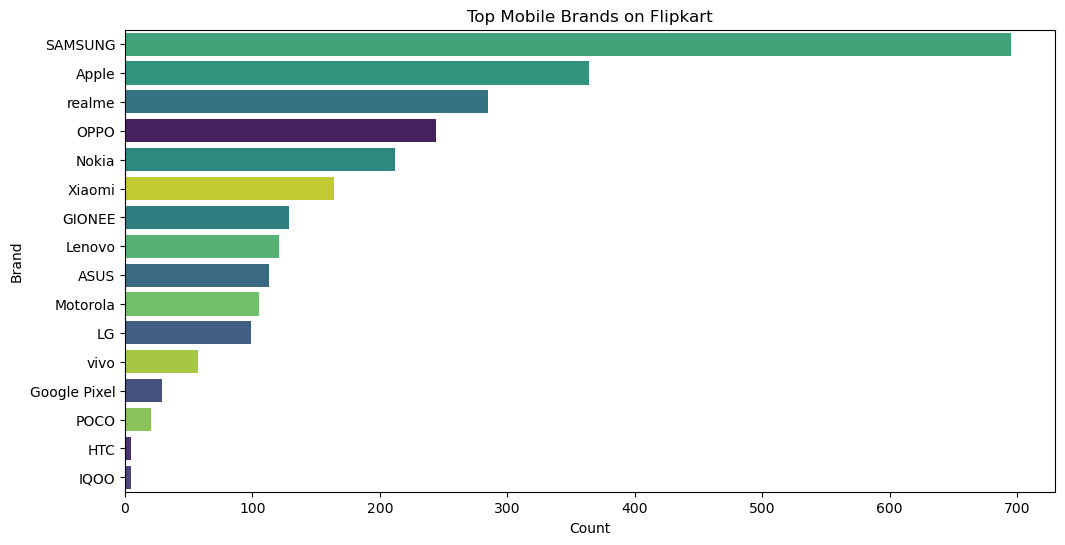

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(
    y=df['Brand'],
    order=df['Brand'].value_counts().index,
    hue=df['Brand'],
    palette='viridis',
    legend=False
)
plt.title("Top Mobile Brands on Flipkart")
plt.xlabel("Count")
plt.ylabel("Brand")
plt.show()


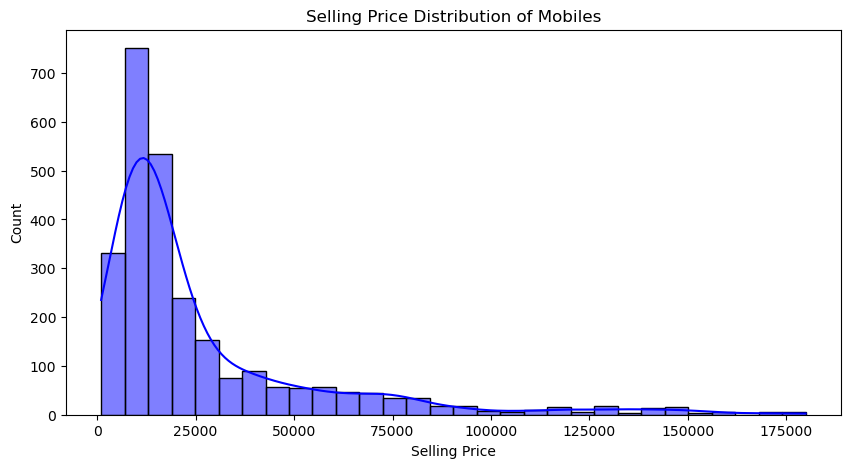

In [43]:
plt.figure(figsize=(10,5))
sns.histplot(df['Selling Price'], bins=30, kde=True, color='blue')
plt.title("Selling Price Distribution of Mobiles")
plt.xlabel("Selling Price")
plt.ylabel("Count")
plt.show()

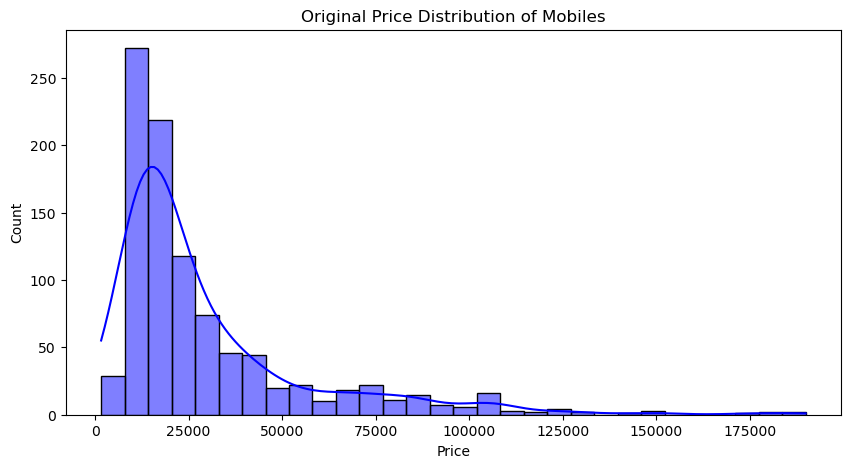

In [45]:
plt.figure(figsize=(10,5))
sns.histplot(df['Original Price'], bins=30, kde=True, color='blue')
plt.title("Original Price Distribution of Mobiles")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

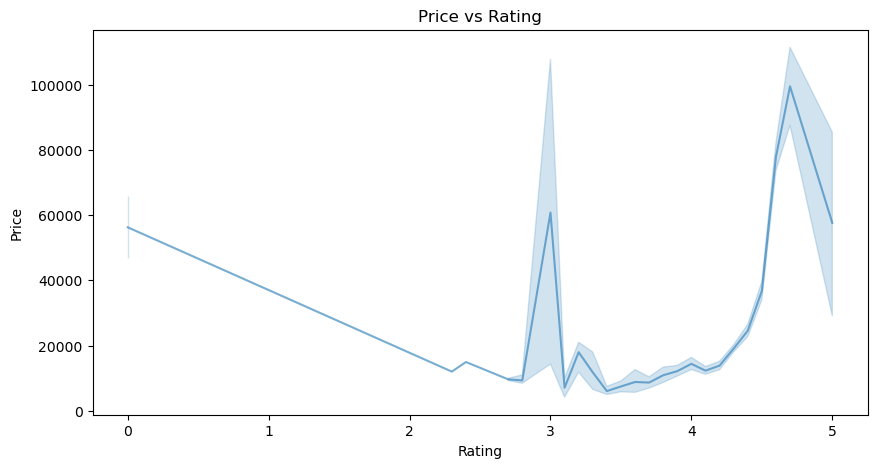

In [47]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['Rating'], y=df['Price'], alpha=0.6)
plt.title("Price vs Rating")
plt.xlabel("Rating")
plt.ylabel("Price")
plt.show()

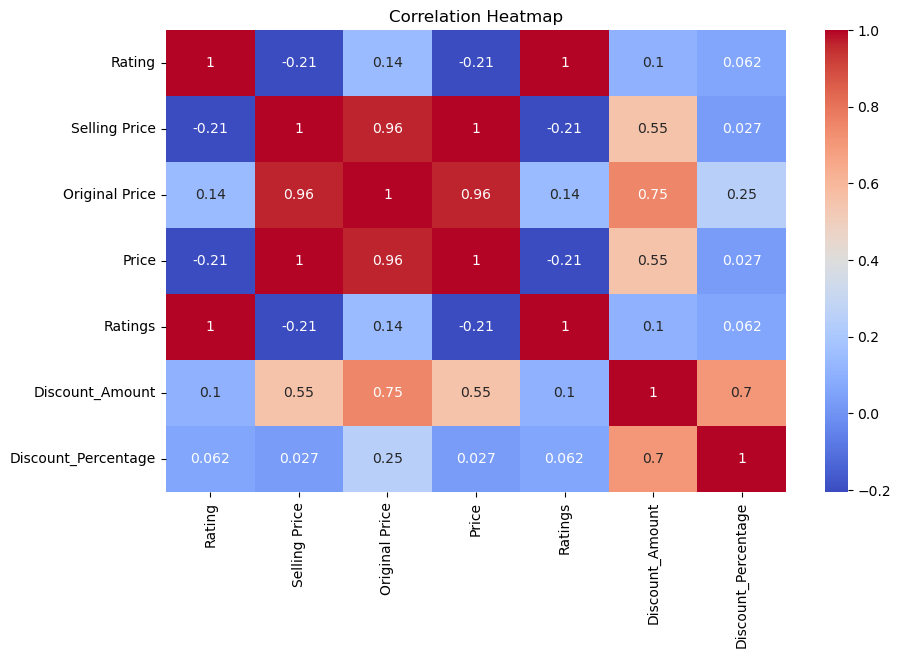

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


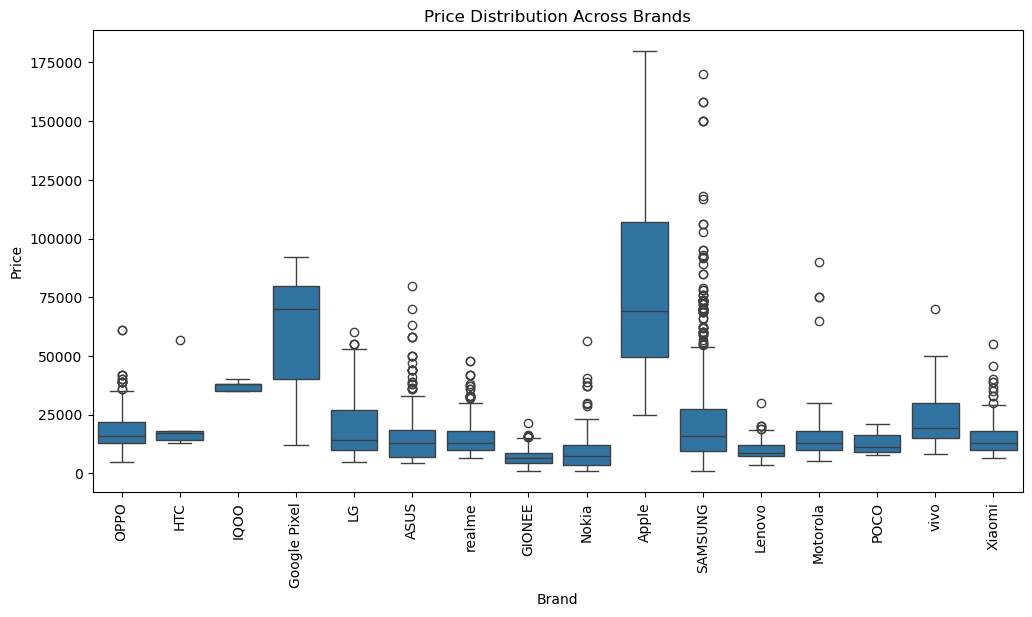

In [53]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Brand', y='Price', data=df)
plt.xticks(rotation=90)
plt.title("Price Distribution Across Brands")
plt.show()

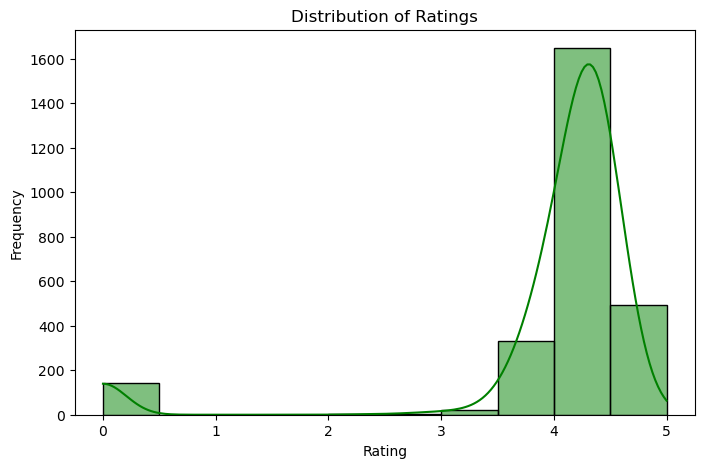

In [55]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=10, kde=True, color='green')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


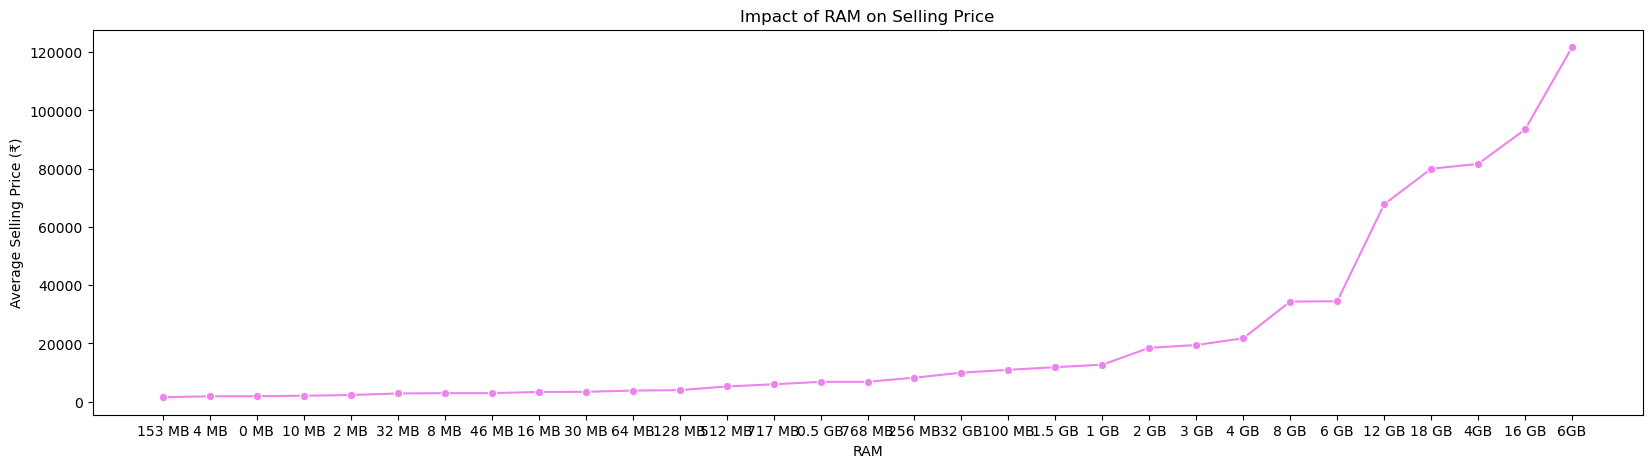

In [57]:
memory_price_impact = df.groupby('Memory')['Selling Price'].mean().sort_values()
plt.figure(figsize=(20, 5))
sns.lineplot(x=memory_price_impact.index, y=memory_price_impact.values, marker='o', color='violet')
plt.title("Impact of RAM on Selling Price")
plt.xlabel("RAM")
plt.ylabel("Average Selling Price (₹)")
plt.show()

## problem solving

In [27]:
df['Discount_Amount'] = df['Original Price'] - df['Selling Price']
df['Discount_Percentage'] = ((df['Discount_Amount'] / df['Original Price']) * 100).round()
print("\nFirst 5 Rows with Discount Information:")
print(df[['Original Price', 'Selling Price', 'Discount_Amount', 'Discount_Percentage']].head())



First 5 Rows with Discount Information:
   Original Price  Selling Price  Discount_Amount  Discount_Percentage
0         15990.0        11990.0           4000.0                 25.0
1         15990.0        11990.0           4000.0                 25.0
2         17990.0        13990.0           4000.0                 22.0
3         17990.0        13990.0           4000.0                 22.0
4         15990.0        11990.0           4000.0                 25.0


In [61]:
top_expensive_brands = df.groupby('Brand')['Price'].mean().sort_values(ascending=False).head(5)
print("\nTop 5 Most Expensive Mobile Brands (Avg Price):")
print(top_expensive_brands)


Top 5 Most Expensive Mobile Brands (Avg Price):
Brand
Apple           78065.142857
Google Pixel    61391.862069
IQOO            37190.000000
SAMSUNG         23829.929496
HTC             23797.200000
Name: Price, dtype: float64


In [63]:
most_popular_brand = df['Brand'].value_counts().idxmax()
print(f"\nMost Popular Brand: {most_popular_brand}")


Most Popular Brand: SAMSUNG


In [65]:
min_price = df['Price'].min()
max_price = df['Price'].max()
avg_price = df['Price'].mean()

print(f"\nPrice Range of Mobiles:")
print(f"Lowest Price: ₹{min_price}")
print(f"Highest Price: ₹{max_price}")
print(f"Average Price: ₹{avg_price:.2f}")


Price Range of Mobiles:
Lowest Price: ₹1000.0
Highest Price: ₹179900.0
Average Price: ₹26461.36


In [67]:
popular_color = df["Color"].mode()[0]
print(f"\n Most popular Mobile color: {popular_color}")


 Most popular Mobile color: Black


In [69]:
most_common_price = df['Price'].mode()[0]
print(f"\nMost Common Mobile Price: ₹{most_common_price}")


Most Common Mobile Price: ₹9999.0


In [71]:
memory_storage_counts = df.groupby(['Memory', 'Storage']).size().reset_index(name='Count')
most_common_memory_storage = memory_storage_counts.nlargest(1, 'Count')
print("\n Most common RAM & Storage combination:")
print(most_common_memory_storage)


 Most common RAM & Storage combination:
   Memory Storage  Count
52   4 GB   64 GB    435


In [82]:
popular_model = df["Model"].value_counts().idxmax()
print("\nMost Popular Model:", popular_model)


Most Popular Model: iPhone 11 


In [73]:
df['Discount (%)'] = ((df['Original Price'] - df['Selling Price']) / df['Original Price']) * 100
max_discount_phone = df.loc[df['Discount (%)'].idxmax()]
print("\nMobile with highest discount:")
print(max_discount_phone[['Brand', 'Model', 'Discount (%)']])


Mobile with highest discount:
Brand                GIONEE
Model           Pioneer P3 
Discount (%)      70.610305
Name: 804, dtype: object


In [75]:
cheapest_phones = df.nsmallest(5, 'Selling Price')
print("\nTop 5 cheapest mobile phones:")
print(cheapest_phones[['Brand', 'Model', 'Selling Price']])


Top 5 cheapest mobile phones:
        Brand          Model  Selling Price
988     Nokia   Ta -1010/105         1000.0
989     Nokia            105         1000.0
812    GIONEE           L700         1099.0
815    GIONEE            S96         1099.0
2012  SAMSUNG  GT 1200 R/I/M         1099.0


In [77]:
bins = [0, 10000, 20000, 40000, 70000]
labels = ['Budget', 'Mid-Range', 'High-End', 'Flagship']
df["Price Category"] = pd.cut(df["Selling Price"], bins=bins, labels=labels)
price_distribution = df["Price Category"].value_counts()
print("\nPrice Range Distribution:\n", price_distribution)


Price Range Distribution:
 Price Category
Mid-Range    922
Budget       789
High-End     441
Flagship     262
Name: count, dtype: int64


In [81]:
df.to_excel(r"C:\Users\Minion\Downloads\Project output datas.xlsx", index=False)
print("\nCleaned dataset saved successfully!")


Cleaned dataset saved successfully!
